In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest
from itertools import combinations

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings("ignore")

# Pair programming Estadística Descriptiva

## Ejercicios estadística descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

**Objetivo:** Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

**Instrucciones:**

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media

- Mediana

- Desviación estándar

- Mínimo

- Máximo

In [2]:
df = pd.read_csv("data/world_data_full_apply_nulos.csv", index_col = 0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
birth_rate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,183.0,1.259155e+02,1.817949e+02,1.016000e+00,7.600000e+00,3.447700e+01,1.850305e+02,7.279730e+02
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility_rate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [4]:
indice_maximo = df['density'].idxmax()
indice_minimo = df['density'].idxmin()

In [5]:
pais_maximo = df.loc[indice_maximo, 'country'] 
pais_minimo = df.loc[indice_minimo, 'country']

pais_maximo

'Palestinian National Authority'

In [6]:
pais_minimo

'Bangladesh'

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [7]:
media_birth = df['birth_rate'].mean()
print(f"La media de la tasa de nacimientos es: {np.round(media_birth, 2)}")

La media de la tasa de nacimientos es: 20.21


4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [8]:
def mortalidad_infantil_analisis (dataframe): # min: 1.5/ mediana: 14/ max: 84.5

    baja = []
    moderada = []
    alta = []

    for indice, value in enumerate(dataframe['infant_mortality']): 
        if value < 10:
            baja.append(df.loc[indice, 'country'])
        elif value >= 10 and value <= 30:
            moderada.append(df.loc[indice, 'country'])
        else:
            alta.append(df.loc[indice, 'country'])

    print(f"Los paises con baja mortalidad son: {baja}")
    print(f"Los paises con media mortalidad son: {moderada}")
    print(f"Los paises con alta mortalidad son: {alta}")
    return 

In [9]:
mortalidad_infantil_analisis(df)

Los paises con baja mortalidad son: ['Albania', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'The Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brunei', 'Bulgaria', 'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Republic of Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saint Kitts and Nevis', 'San Marino', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
Los paises con media mortalidad son: ['Algeria', 'Ar

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [10]:
correlacion = df['fertility_rate'].corr(df['life_expectancy'])
correlacion


-0.8491528107360009

In [11]:
if correlacion > 0:
    print("Hay una correlación positiva entre la tasa de fertilidad y la esperanza de vida.")
elif correlacion < 0:
    print("Hay una correlación negativa entre la tasa de fertilidad y la esperanza de vida.")
else:
    print("No hay correlación entre la tasa de fertilidad y la esperanza de vida.")

Hay una correlación negativa entre la tasa de fertilidad y la esperanza de vida.


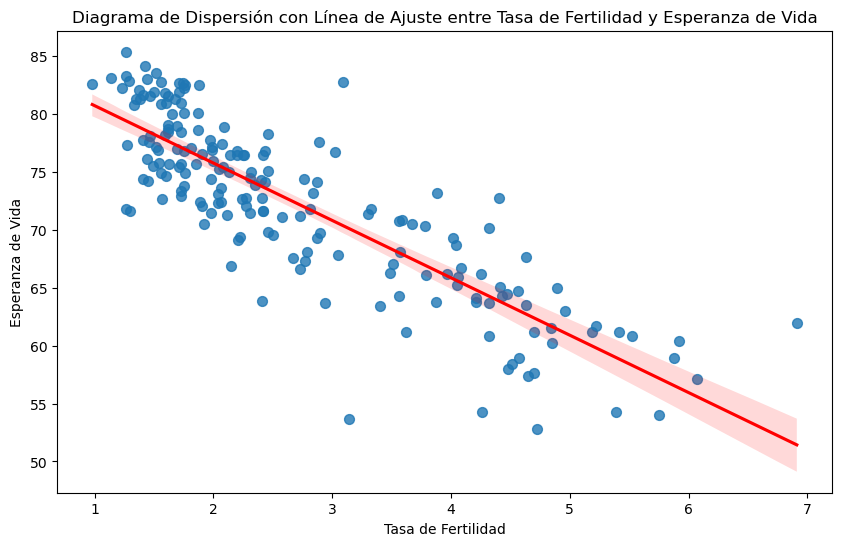

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot(x='fertility_rate', y='life_expectancy', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title('Diagrama de Dispersión con Línea de Ajuste entre Tasa de Fertilidad y Esperanza de Vida')
plt.xlabel('Tasa de Fertilidad')
plt.ylabel('Esperanza de Vida')

plt.show()

**Bonus:**

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [14]:
# Primero calculamos la diferencia entre ambos valores, una simple resta.

df['difference'] = df['gdp'] - df['co2-emissions']

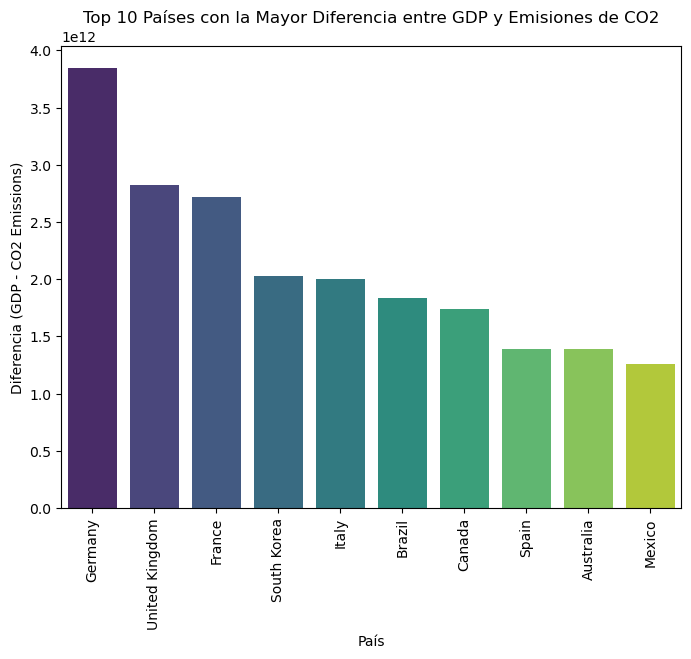

In [15]:
# He creado un dataframe acortado con los diez paises con más diferencia entre estos dos valores porque mejoraba la visualización de la tabla, si no era enorme y no se veía bien.

df_sorted = df.sort_values(by='difference', ascending=False)
top_10 = df_sorted.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(y='difference', x='country', data=top_10, palette='viridis')

plt.title('Top 10 Países con la Mayor Diferencia entre GDP y Emisiones de CO2')
plt.xlabel('País')
plt.ylabel('Diferencia (GDP - CO2 Emissions)')
plt.xticks(rotation=90); 

plt.show()

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.



9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [16]:
df_correlaciones = df.corr(numeric_only=True, method = "spearman")
df_correlaciones

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,difference
density,1.000000,0.200302,-0.220539,0.125936,-0.176731,-0.109384,0.209351,-0.119915,-0.138960,-0.176856,-0.015206,0.104546,-0.004021,0.033382,-0.012201,-0.095937,0.135093,-0.098955,0.061765,0.014885,0.026946,-0.511743,-0.090923,0.094292,0.023721,-0.152447,-0.359084,0.116068,0.021248,0.006759
agricultural_land,0.200302,1.000000,0.022158,0.173127,0.173660,-0.036252,0.015142,0.249278,0.232981,0.164436,-0.382159,0.031457,0.078430,-0.060903,-0.132087,0.200319,-0.221712,0.146761,-0.191189,0.111157,-0.080401,-0.140550,-0.150819,-0.072350,0.159252,0.055847,-0.025796,0.004682,-0.012907,0.075940
land_area,-0.220539,0.022158,1.000000,0.384287,0.178757,-0.242378,0.166552,0.136854,0.224723,0.175796,-0.008680,-0.089567,0.171319,0.022693,-0.071133,0.222185,-0.176727,0.179866,-0.097304,0.112200,-0.210800,-0.398381,0.033388,-0.209875,0.162818,0.005533,-0.485771,-0.158250,0.047216,0.129286
armed_forces_size,0.125936,0.173127,0.384287,1.000000,-0.118602,-0.241026,0.477055,0.094123,0.084370,-0.095454,-0.153847,-0.197941,0.696120,-0.000946,0.255177,-0.104961,0.162024,-0.130828,0.097284,0.259397,0.120254,0.806751,-0.121036,-0.234878,0.162857,-0.090453,0.476780,0.123754,0.234507,0.692158
birth_rate,-0.176731,0.173660,0.178757,-0.118602,1.000000,0.164103,-0.246307,0.391884,0.237546,0.980987,-0.084387,-0.302687,-0.416506,0.064180,-0.787452,0.895507,-0.859974,0.856945,-0.657015,0.245818,-0.845314,0.349382,0.213206,-0.397999,0.168458,-0.055770,0.106992,-0.596338,0.040054,-0.431593
calling_code,-0.109384,-0.036252,-0.242378,-0.241026,0.164103,1.000000,-0.265872,0.105980,-0.016856,0.164907,-0.085191,-0.143463,-0.356442,-0.068676,-0.227563,0.106171,-0.154025,0.051555,-0.151760,-0.054249,-0.074278,0.047469,0.084262,0.005102,-0.334636,-0.091476,-0.163097,-0.043635,0.304064,-0.315823
co2-emissions,0.209351,0.015142,0.166552,0.477055,-0.246307,-0.265872,1.000000,-0.142751,-0.131654,-0.205801,0.003200,0.031760,0.300473,0.080741,0.266869,-0.254783,0.261146,-0.292307,0.378285,-0.180222,0.192914,-0.345963,-0.148427,0.023486,0.065845,-0.002232,-0.349605,0.136520,0.060003,0.300473
cpi,-0.119915,0.249278,0.136854,0.094123,0.391884,0.105980,-0.142751,1.000000,0.804287,0.359507,-0.091008,-0.325114,0.008686,0.149329,-0.291723,0.419904,-0.422903,0.415222,-0.475015,0.185645,-0.293830,0.219941,0.039076,-0.320285,0.092007,0.023119,0.265291,-0.261395,0.164743,-0.004117
cpi_change,-0.138960,0.232981,0.224723,0.084370,0.237546,-0.016856,-0.131654,0.804287,1.000000,0.216461,-0.033153,-0.146547,0.020980,0.043075,-0.173455,0.283011,-0.314851,0.273891,-0.320803,0.155117,-0.187636,0.201357,-0.048238,-0.237048,0.095983,0.159493,0.153673,-0.103437,0.034444,-0.010097
fertility_rate,-0.176856,0.164436,0.175796,-0.095454,0.980987,0.164907,-0.205801,0.359507,0.216461,1.000000,-0.071624,-0.280087,-0.417396,0.050522,-0.760185,0.867469,-0.843047,0.830900,-0.604140,0.187757,-0.817209,0.174954,0.191111,-0.391246,0.171121,-0.071483,-0.020917,-0.578658,0.037592,-0.418319


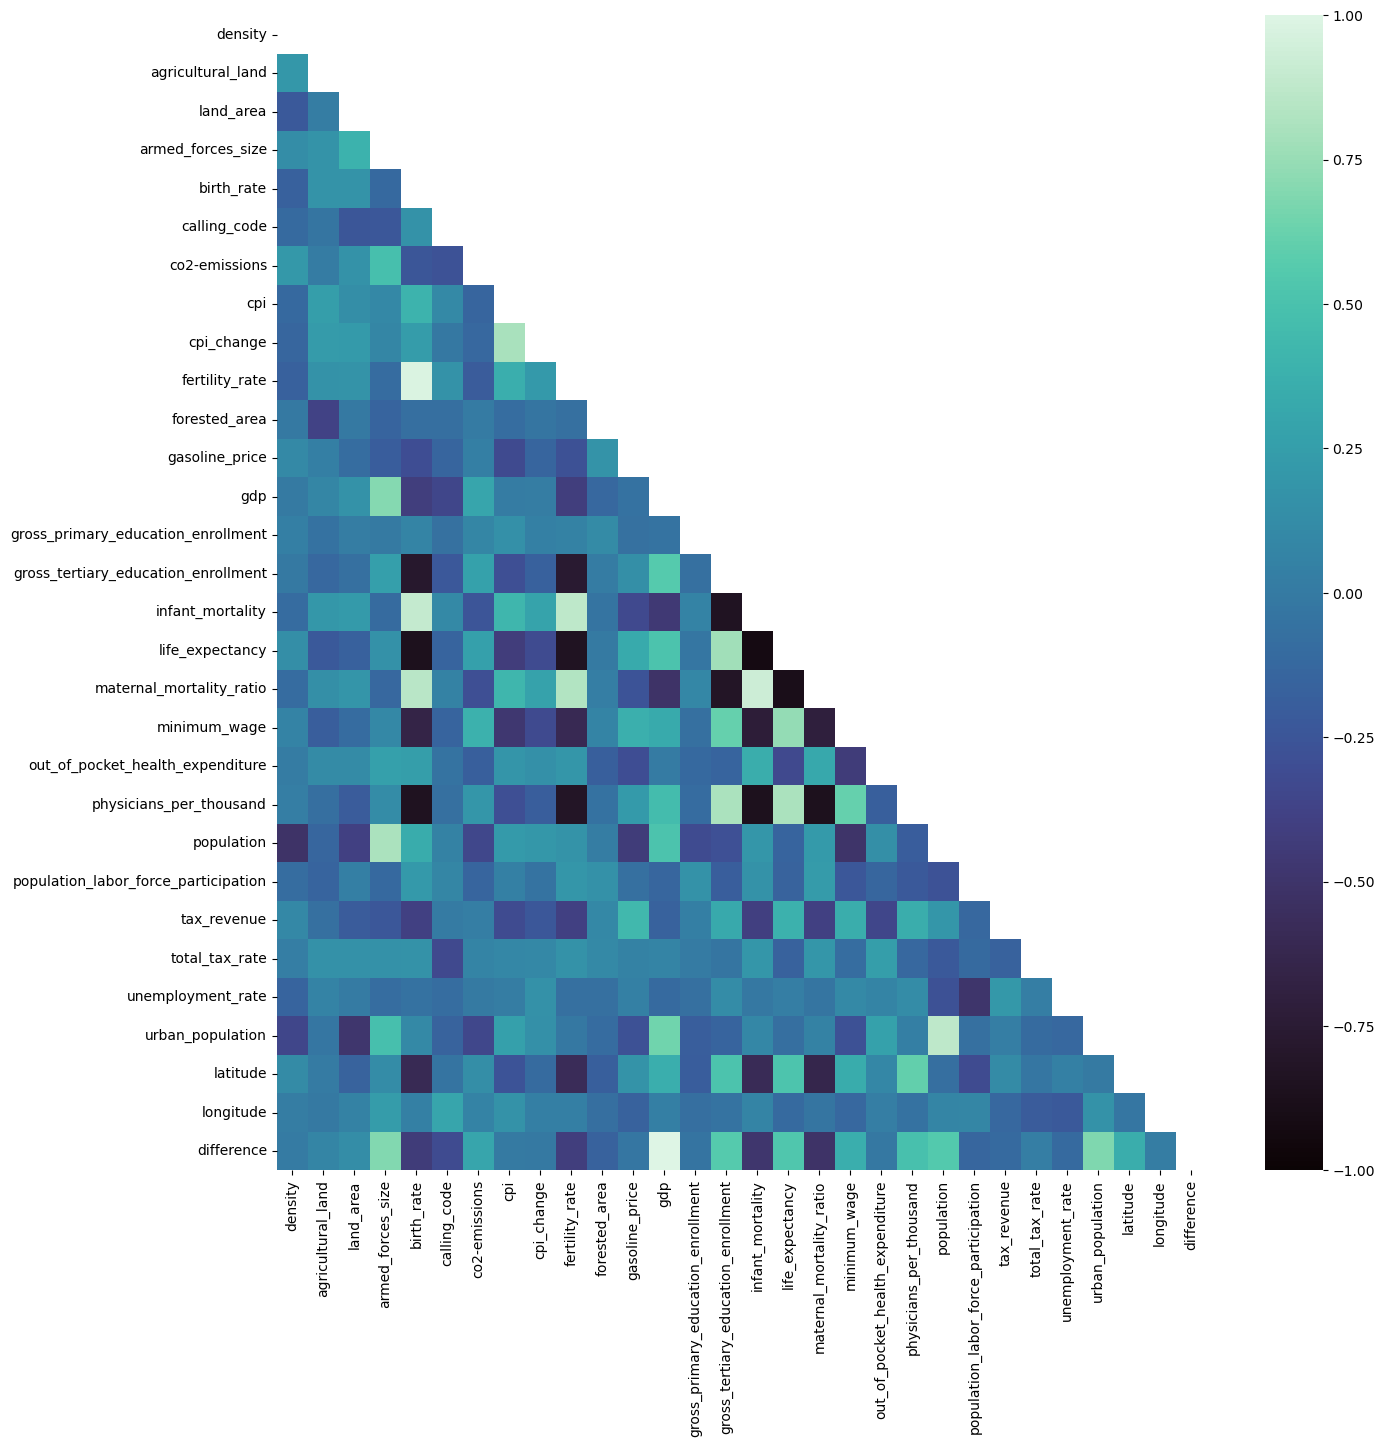

In [17]:
# Aunque esta es la forma de hacerlo, a mi siguen si salirme los números dentro de los cuadraditos. César me dijo que lo investigaría, porque le pasa a más compañeras.

plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 